In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
arr = np.array([1, 2, 3])
print(arr)

[1 2 3]


In [4]:
a = np.random.rand(1000000) # Here, inside the small parenthesis dimension is shown
b = np.random.rand(1000000)
c = 0

tic = time.time()
c = np.dot(a, b)
toc = time.time()

print(c)
print("Vectorized Version " + str(1000*(toc-tic)) + " ms") # tin oota nai string so that we can concatenate using "+" symbol.
# Yes, you can write str() inside print(), but its primary purpose is type conversion to
# allow string concatenation (+), not for formatted output in the modern sense.
# Here, we have multiplied by one thousand for milli seconds.

c = 0
tic = time.time()
for i in range(1000000):
  c += a[i] * b[i]
toc = time.time()

print(c)
print("For Loop " + str(1000 * (toc - tic)) + " ms")

250047.0757802964
Vectorized Version 31.068801879882812 ms
250047.0757802935
For Loop 361.173152923584 ms


# Broadcasting Revision

In [5]:
var = np.array([[56.0, 0.0, 8.0, 68.0],
                [0.0, 8.5, 78.0, 89.0],
                [6.0, 78.0, 89.0, 67.0]])
print(var)
print(var.shape)

[[56.   0.   8.  68. ]
 [ 0.   8.5 78.  89. ]
 [ 6.  78.  89.  67. ]]
(3, 4)


In [6]:
total = var.sum(axis = 0) # It adds vertically.
print(total)
print(total.shape)

[ 62.   86.5 175.  224. ]
(4,)


In [7]:
percentage = 100* var / total
print(percentage)

[[90.32258065  0.          4.57142857 30.35714286]
 [ 0.          9.8265896  44.57142857 39.73214286]
 [ 9.67741935 90.1734104  50.85714286 29.91071429]]


In [8]:
#  Or we can also do as below
percentage = 100* var / total.reshape(1, 4)
print(percentage)

[[90.32258065  0.          4.57142857 30.35714286]
 [ 0.          9.8265896  44.57142857 39.73214286]
 [ 9.67741935 90.1734104  50.85714286 29.91071429]]


In [9]:
arr = np.random.randint(0, 10, size = 5)
print(arr)
print(arr.shape)
# We can see that arr is a Rank 1 array.

[5 3 1 6 4]
(5,)


In [10]:
print(arr.T)
print(arr *arr.T)
print(np.dot(arr, arr.T))
# Here, .T means transpose.

[5 3 1 6 4]
[25  9  1 36 16]
87


In [11]:
# Now let's take a Rank 2 array
arr2 = arr.reshape(1,5)
print(arr2)
print(arr2.T)
print(arr2 * arr2.T)
print(np.dot(arr2, arr2.T))

[[5 3 1 6 4]]
[[5]
 [3]
 [1]
 [6]
 [4]]
[[25 15  5 30 20]
 [15  9  3 18 12]
 [ 5  3  1  6  4]
 [30 18  6 36 24]
 [20 12  4 24 16]]
[[87]]


In [12]:
def lol():
  arr9 = np.array([[2, 1], [1, 3]])
  print(arr9 * arr9)

lol()

[[4 1]
 [1 9]]


In [13]:
def lol():
    # Use probabilities (between 0 and 1)
    y_hat = np.array([0.9, 0.1]) # Predictions
    y = np.array([1, 0])         # Actual labels (cat=1, non-cat=0)

    # Vectorized cost calculation
    # Note: We usually divide by m (number of examples) to get the average
    m = y.shape[0]
    print(y.shape)
    print(m)
    cost = (-1/m) * np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

    print(f"Cost: {cost}")
    print(f"Shape: {cost.shape}")

lol()

(2,)
2
Cost: 0.10536051565782628
Shape: ()


<built-in method mean of numpy.ndarray object at 0x00000163FD65EA90>


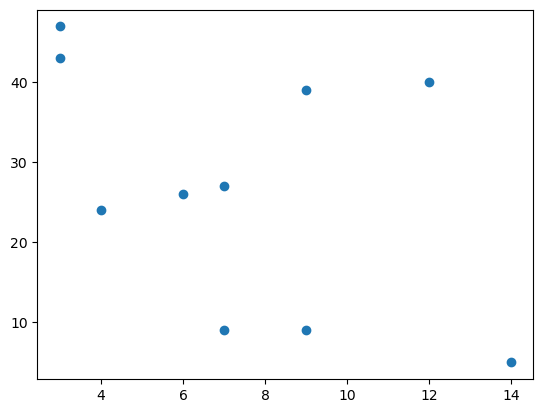

In [ ]:
np.random.seed(7)
X = np.random.randint(0, 15, size = 10)
Y = np.random.randint(1, 64, size = 10)

plt.scatter(X, Y)

-2.0816681711721684e-18 4.336808689942018e-20
0.0005453254250850948 1.0631560631976829e-07


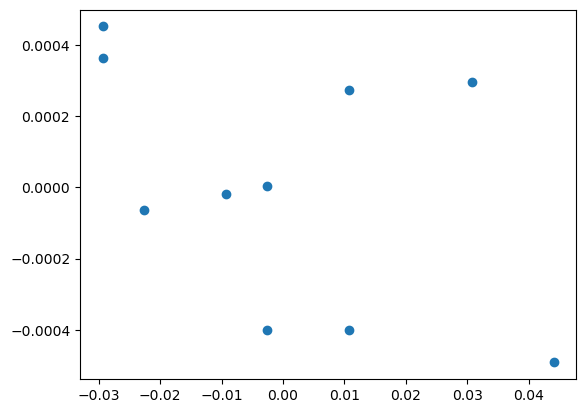

In [35]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)
print(mean_X, mean_Y)

var_X = 1/10 * np.sum(np.pow((X - mean_X), 2)) # It is numpy vectorizaiton.
var_Y = 1/10 * np.sum(np.pow((Y-mean_Y), 2)) # It is numpy vectorization.
print(var_X, var_Y)

# Now we normalize
X_norm1 = X - mean_X # Here, we use the concept of numpy broadcasting.
Y_norm1 = Y - mean_Y

plt.scatter(X_norm1, Y_norm1)

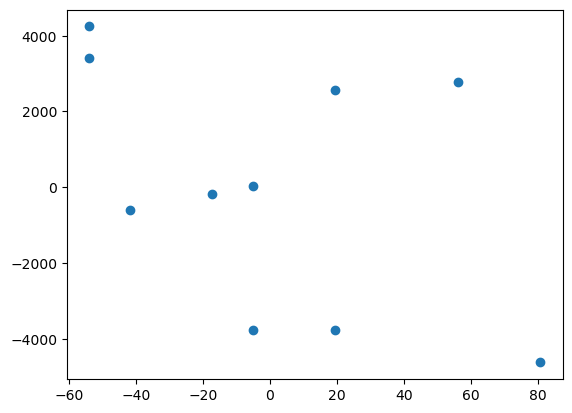

In [36]:
# Again, continuing normalization
X_norm2  = X/var_X
Y_norm2 =  Y/var_Y

plt.scatter(X_norm2, Y_norm2)

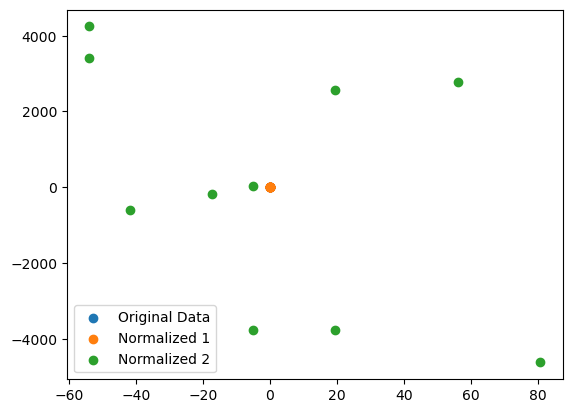

In [42]:
# Your normalization data should be defined here
# x_norm1, y_norm1, etc.

# 1. Plot the original data
plt.scatter(X, Y, label='Original Data')

# 2. Plot the first normalized dataset
plt.scatter(X_norm1, Y_norm1, label='Normalized 1')

# 3. Plot the second normalized dataset
plt.scatter(X_norm2, Y_norm2, label='Normalized 2')

# Optional: Add a legend to distinguish the three datasets
plt.legend()

# Display everything together
plt.show()

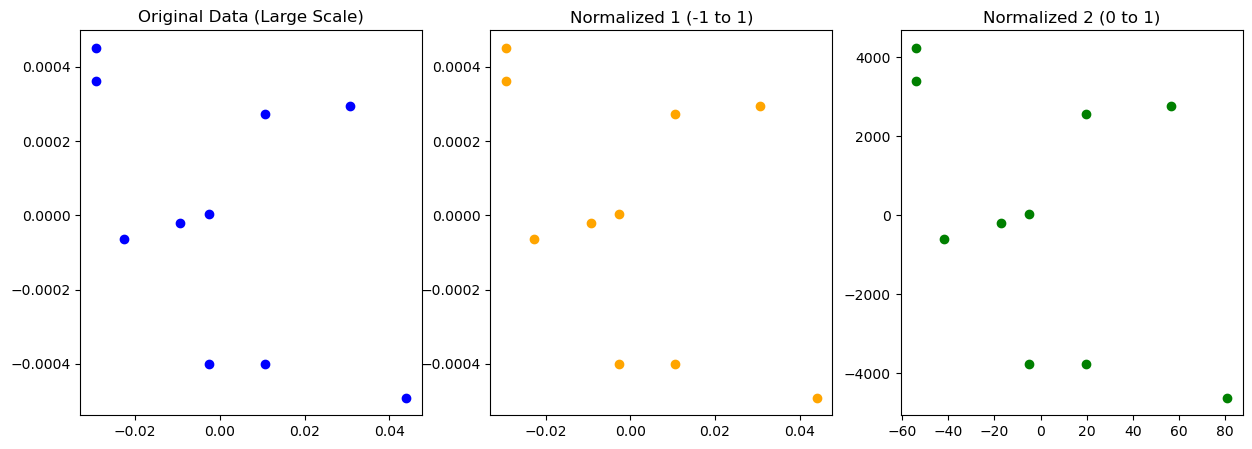

In [44]:
# Object Oriented Approach
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(X, Y, color='blue')
axs[0].set_title('Original Data (Large Scale)')

axs[1].scatter(X_norm1, Y_norm1, color='orange')
axs[1].set_title('Normalized 1 (-1 to 1)')

axs[2].scatter(X_norm2, Y_norm2, color='green')
axs[2].set_title('Normalized 2 (0 to 1)')

plt.show()

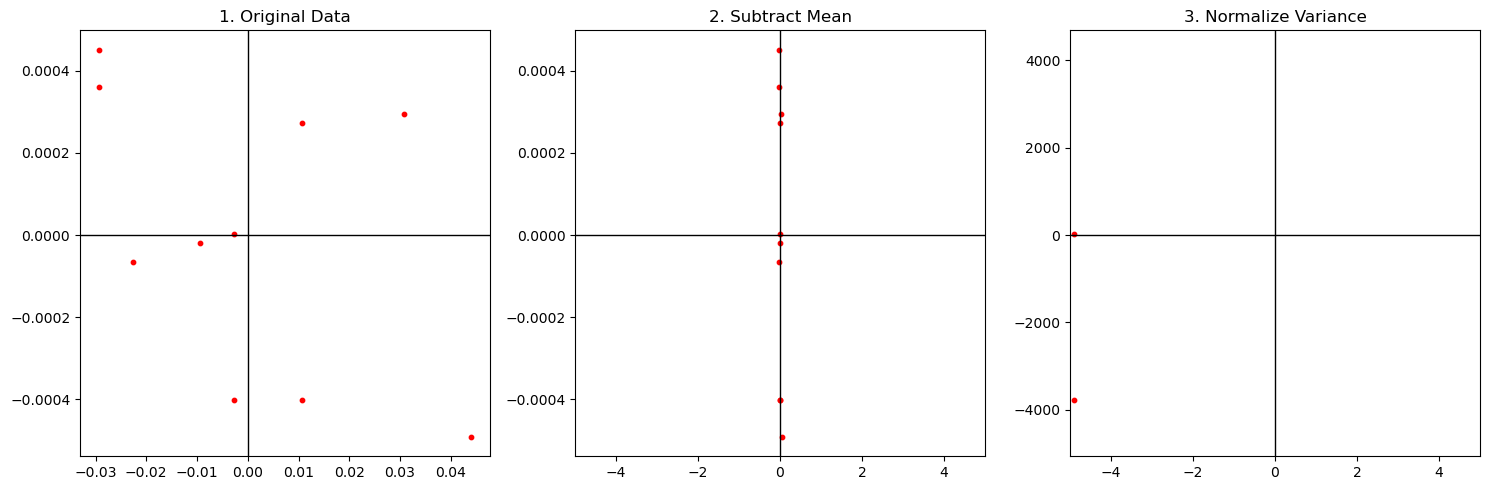

In [45]:
#  We can also do as shown below

# 1. Setup the figure with 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Original Data
ax1.scatter(X, Y, color='red', s=10)
ax1.set_title('1. Original Data')
ax1.axhline(0, color='black', linewidth=1) # Adds the x-axis line
ax1.axvline(0, color='black', linewidth=1) # Adds the y-axis line

# Plot 2: Subtract Mean (Centering)
# Assuming X_centered = X - mu
ax2.scatter(X_norm1, Y_norm1, color='red', s=10) 
ax2.set_title('2. Subtract Mean')
ax2.axhline(0, color='black', linewidth=1)
ax2.axvline(0, color='black', linewidth=1)
ax2.set_xlim([-5, 5]) # Matches the scale shown in your notes

# Plot 3: Normalize Variance
# Assuming X_final = X_centered / sigma^2
ax3.scatter(X_norm2, Y_norm2, color='red', s=10)
ax3.set_title('3. Normalize Variance')
ax3.axhline(0, color='black', linewidth=1)
ax3.axvline(0, color='black', linewidth=1)
ax3.set_xlim([-5, 5]) 

plt.tight_layout() # Ensures titles don't overlap
plt.show()